## Import all packages and data

In [1]:
# Standard Packages
import pandas as pd
import numpy as np
import markdown

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
hd = pd.read_csv("/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/kc_house_data.csv")
f = open('/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/column_names.md', 'r')
desc=markdown.markdown( f.read() )
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
hd.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
hd.loc[hd['sqft_living'] == 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
14977,1549500215,12/17/2021,1803000.0,4,4.0,3,326701,2.0,NO,NO,...,PRIVATE,2,1,1,0,2021,0,"31072 Northeast 165th Street, Duvall, Washingt...",47.74529,-121.92362


In [5]:
hd.drop(index = 14977, inplace = True, axis = 0)

In [6]:
nobed_nobath = hd.loc[(hd['bedrooms'] == 0) | (hd['bathrooms'] == 0)]
nobed_nobath.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
573,3920030050,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,...,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.67270,-122.31781
1289,2768301406,3/2/2022,1090000.0,0,0.0,1500,1262,3.0,NO,NO,...,PUBLIC,1500,0,0,0,2021,0,"A, Leadwood, Missouri 63653, United States",37.85979,-90.58113


In [7]:
hd['id'].value_counts()

1233100736    2
6632900607    1
955000401     1
1423089049    1
3892500020    1
             ..
1946000070    1
1250201175    1
5422570190    1
691000015     1
9430110210    1
Name: id, Length: 30153, dtype: int64

In [8]:
hd.drop(index = nobed_nobath.index, inplace = True, axis = 0)

In [9]:
hd["grade"]

0        7 Average
1        7 Average
2        7 Average
3         9 Better
4        7 Average
           ...    
30150       8 Good
30151    7 Average
30152    7 Average
30153       8 Good
30154    7 Average
Name: grade, Length: 30104, dtype: object

In [10]:
#add zip column for zipcodes
hd["zip"] = hd.address.str[-20:-15]

#remove data that is outside of King County
zips=[98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]
zips_strings = [str(i) for i in zips]
zips = zips_strings
non_wa_zips = hd.loc[~hd["zip"].isin(zips)]
hd.drop(index = non_wa_zips.index, inplace = True, axis = 0)

#convert zip category to integers
hd["zip"] = hd["zip"].astype(int)

#remove duplicate rows
hd = hd.drop_duplicates(subset=["id"])

# find and drop sales records with no bedrooms or no bathrooms
nobed_nobath = hd.loc[(hd['bedrooms'] == 0) | (hd['bathrooms'] == 0)]
hd.drop(index = nobed_nobath.index, inplace = True, axis = 0)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
#remove id column
hd = hd.drop(columns=["id"])

#add columns for year sold and years old
hd["year_sold"] = hd.date.str[-4:].astype(int)
hd["years_old"] = 2023-hd["yr_built"]

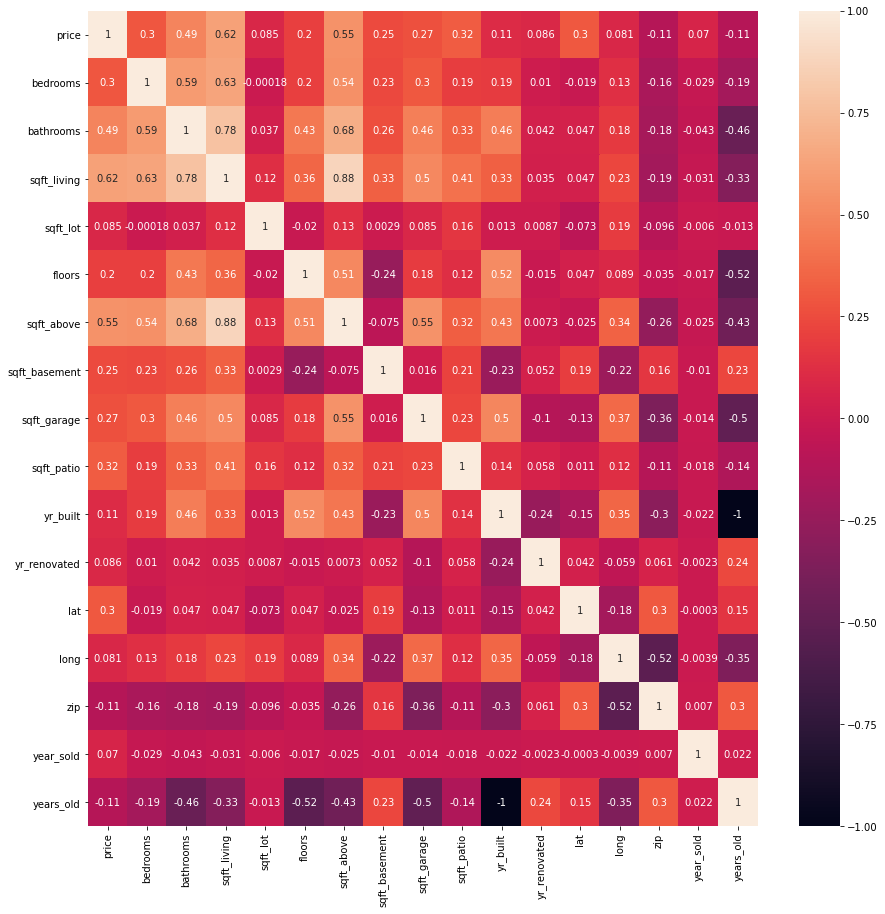

In [12]:
#plot the heatmap to determine correlations
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(hd.corr(), annot=True);

In [13]:
#list correlations
price_corrs = hd.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.620117
sqft_above       0.549083
bathrooms        0.491485
sqft_patio       0.318593
lat              0.298873
bedrooms         0.295277
sqft_garage      0.269111
sqft_basement    0.247288
floors           0.201767
yr_built         0.107067
years_old        0.107067
zip              0.106358
yr_renovated     0.085973
sqft_lot         0.084831
long             0.081021
year_sold        0.070306
Name: price, dtype: float64

## Simple Linear Regression - Baseline Model with Train-Test Split

In [14]:
# define variables for simple linear regression
y = hd['price']
X = hd.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# double check train-test split 
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 21873 rows and 26 columns
y_train is a Series with 21873 values


In [15]:
# select our best correlated predictor, as our X Train
baseline_X_train = X_train[['sqft_living']]

# Do the same for X Test
baseline_X_test = X_test[['sqft_living']]

# instantiate the baseline model
baseline_model = LinearRegression()

# Fit our model
baseline_model.fit(baseline_X_train, y_train)

# Get our R2 score
print('Base Training R2:', round(baseline_model.score(baseline_X_train, y_train), 4))
print('Base Test R2:', round(baseline_model.score(baseline_X_test, y_test), 4))
print()

# set up a validation model 
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=baseline_X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Validation Checks")
print("Baseline Model Train score:", round(baseline_scores["train_score"].mean(), 4))
print("Baseline Model Validation score:", round(baseline_scores["test_score"].mean(), 4))
print()

# Calculate predictions on training and test sets
train_preds = baseline_model.predict(baseline_X_train)
test_preds = baseline_model.predict(baseline_X_test)

# Calculate training and test MSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print('Train Root Mean Squared Error:', train_rmse)
print('Test Root Mean Squared Error:', test_rmse)
print('Difference in RMSE for Test/Train:', abs(round(test_rmse - train_rmse, 2)))

Base Training R2: 0.4058
Base Test R2: 0.3252

Validation Checks
Baseline Model Train score: 0.398
Baseline Model Validation score: 0.4306

Train Root Mean Squared Error: 681623.3182668397
Test Root Mean Squared Error: 753813.4186429505
Difference in RMSE for Test/Train: 72190.1


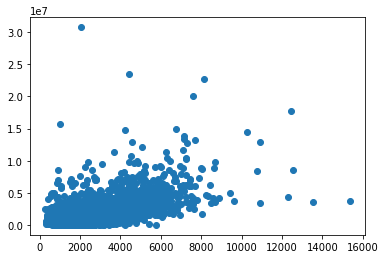

In [16]:
plt.scatter(x=hd["sqft_living"], y=hd["price"]);

## Polynomial Model

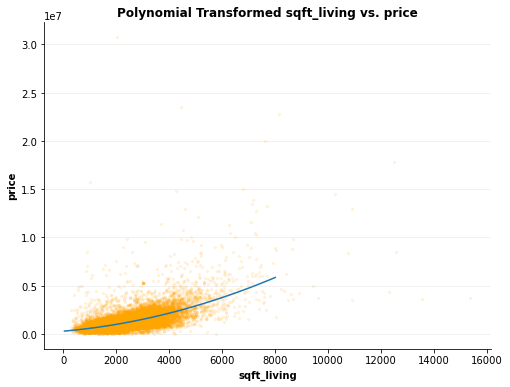

In [17]:
# fit and transform the X_train sqft_living column to a poly of 2
poly2 = PolynomialFeatures(2)
poly_sqft = poly2.fit_transform(X_train[['sqft_living']])

# instantiate a PolynomialFeatures and fit/transfrom to X_poly
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(baseline_X_train)

# fit X_poly to Linear Regression model 
reg_poly = LinearRegression().fit(X_poly, y_train)

# create line parameters 
X_linspace = pd.DataFrame(np.linspace(50, 8000, 50), columns= ['sqft_living'])

# create poly line X and Y values
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

# set up fig
fig, ax = plt.subplots(figsize=(8, 6))

# plot polynomial regression line against the data
plt.scatter(hd['sqft_living'], hd['price'], 
            s = 5, alpha = 0.1, 
            color='orange')

plt.plot(X_linspace, y_poly_pred)
plt.xlabel('sqft_living', weight = 'bold')
plt.ylabel('price', weight = 'bold')
ax.set_title('Polynomial Transformed sqft_living vs. price', weight = 'bold');

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show();

In [18]:
# instantiate a poly baseline model
poly_baseline_model = LinearRegression()

# Fit our poly model
poly_baseline_model.fit(X_poly, y_train)
poly_baseline_model.score(X_poly, y_train)

0.431359547772741

## Add School Data

Data from https://data.wa.gov/education/Report-Card-Assessment-Data-2021-22-School-Year/v928-8kke and https://eds.ospi.k12.wa.us/directoryeds.aspx

In [20]:
#Import school data
rc = pd.read_csv("/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/Report_Card_Assessment_Data_2021-22_School_Year.csv")
addresses=pd.read_csv("/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/Washington_School_Directory_20230214.csv")

#Clean up Addresses dataframe
addresses["ZipCode"] = addresses["ZipCode"].apply(lambda x: x[:5])
non_waaddresses = addresses[~addresses['ZipCode'].isin(zips)]
addresses.drop(index = non_waaddresses.index, inplace = True, axis = 0)
addresses=addresses[["SchoolName", "ZipCode"]]

#Clean up Report Card dataframe

rc = rc[["OrganizationLevel", "County", "SchoolName", "GradeLevel", "TestSubject", "PercentMetStandard"]]
rc = rc[rc["County"] == "King"].drop(columns=["County"])
rc = rc[rc["OrganizationLevel"] == "School"].drop(columns=["OrganizationLevel"])
rc = rc[rc["GradeLevel"] == "All Grades"].drop(columns=["GradeLevel"])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


FileNotFoundError: [Errno 2] No such file or directory: '/Users/eli/Desktop/Kings-County-Real-Estate-analysis-NAEG/data/Washington_School_Directory_20230214.csv'

In [ ]:
#Standardize data under percent met standard column
rc["PercentMetStandard"]=rc["PercentMetStandard"].replace("Suppressed: N<10", "0.0%")
rc["PercentMetStandard"]=rc["PercentMetStandard"].replace("No Students", "0.0%")
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip("%"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip(">"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].apply(lambda x: x.strip("<"))
rc["PercentMetStandard"]=rc["PercentMetStandard"].astype(float)

#Average test scores and create a ratings column
rc = rc.groupby(["SchoolName"]).aggregate({"PercentMetStandard":"mean"}).sort_values(by=["SchoolName"]).reset_index()
rc["rating"] = rc["PercentMetStandard"]/10

In [ ]:
#Join dataframes and remove excess columns
schools = rc.merge(addresses, left_on="SchoolName", right_on="SchoolName")
schools = schools[["SchoolName", "rating", "ZipCode"]]
schools["ZipCode"] = schools["ZipCode"].astype(int)

In [ ]:
schools_dict = dict(zip(schools.ZipCode, round(schools.rating, 1)))

In [ ]:
X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)

In [ ]:
X_train

In [ ]:
scale_mapper1 = {"NONE":0, "FAIR": 1, "AVERAGE":2, "GOOD":3, "EXCELLENT":4}
X_train["view"] = X_train["view"].replace(scale_mapper1)

scale_mapper2 = {"Poor":0, "Fair": 1, "Average":2, "Good":3, "Very Good":4}
X_train["condition"] = X_train["condition"].replace(scale_mapper2)

scale_mapper3 = {"1 Cabin":1, "2 Substandard": 2, "3 Poor":3, "4 Low":4, "5 Fair":5, 
               "6 Low Average":6, "7 Average": 7, "8 Good":8, "9 Better":9, "10 Very Good":10,
               "11 Excellent": 11, "12 Luxury":12, "13 Mansion":13 }
X_train["grade"] = X_train["grade"].replace(scale_mapper3)

In [ ]:
X_train = pd.get_dummies(X_train, columns = ['waterfront', 'greenbelt', 'nuisance'], drop_first = True)

In [ ]:
X_train = X_train.drop(columns=["heat_source", "sewer_system", "address", "lat", "long"])

In [ ]:
X_train.loc[X_train['avg_school_quality'].isna()] = X_train['avg_school_quality'].mean()
X_train.info()

# All Variable Model

In [ ]:
all_variable_X = X_train
all_variable_X = all_variable_X.drop(columns=["date", "year_sold"])

In [ ]:
all_variable_model = sm.OLS(y_train, sm.add_constant(all_variable_X)).fit()
all_variable_model.summary()

#add requirements for our stakeholder
hd = hd.loc[(hd["bedrooms"] > 1) & (hd["bedrooms"]<=5)]
hd = hd.loc[hd["price"]<=1300000]
hd = hd.drop(columns=["date"])

# Recursive Feature Elimination Model

In [ ]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 5)

In [ ]:
select.fit(X = all_variable_X, y = y_train)

In [ ]:
select.ranking_

In [ ]:
all_variable_X.columns

In [ ]:
pd.DataFrame(data=select.ranking_, index=all_variable_X.columns)

In [ ]:
rfe_X = all_variable_X[['bathrooms', 'floors', 'grade', 'avg_school_quality', 'greenbelt_YES', 'waterfront_YES']]
all_variable_model = sm.OLS(y_train, sm.add_constant(rfe_X)).fit()
all_variable_model.summary()

## Log Transformation

In [ ]:
# set up figure for predictor variables in all_variable_X
fig, axes = plt.subplots(nrows=(all_variable_X.shape[1] // 4), ncols=4, figsize=(12,25))

# for each col in X_third, plot distribution
for col, ax in zip(all_variable_X, axes.flatten()):
    ax.hist(all_variable_X[col], bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

In [ ]:
#selecting variables for log
log_variables = ['sqft_living','sqft_above', 'years_old','bathrooms', 'bedrooms']

# assign to X_cont
X_logs = all_variable_X[log_variables]

In [ ]:
X_logs

In [ ]:
X_logs.describe()

In [ ]:
#log transformation
log_columns = [f'{column}_log' for column in X_logs.columns]
cont_log = np.log(X_logs)
cont_log.columns = log_columns
cont_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

In [ ]:
cont_log

In [ ]:
log_transformed = cont_log.join(all_variable_X).drop(columns = ["sqft_living", "sqft_above", "sqft_lot", 'years_old',
                                                                'bathrooms', 'bedrooms', "yr_renovated", "yr_built", 
                                                                "sqft_basement", "sqft_garage", "sqft_patio"])
log_transformed

In [ ]:
log_y = np.log(y_train)

In [ ]:
log_model = sm.OLS(log_y, sm.add_constant(log_transformed)).fit()
log_model.summary()

## One Hot Encode Zip Codes

In [ ]:
log_transformed_zips = pd.get_dummies(log_transformed, columns = ['zip'], drop_first = True)
log_transformed_zips.columns

In [ ]:
log_zips_model = sm.OLS(log_y, sm.add_constant(log_transformed_zips)).fit()
log_zips_model.summary()

In [ ]:
zips_ohe = pd.get_dummies(log_transformed['zip'], drop_first = True)
zips_school = zips_ohe.mul(log_transformed_zips['avg_school_quality'], axis = 0)

In [ ]:
zips_school_interaction = pd.merge(zips_school, 
                                   log_transformed_zips[['sqft_living_log', 'sqft_above_log',
                                                                      'years_old_log', 'bathrooms_log',
                                                                      'bedrooms_log', 'floors', 'view',
                                                                      'condition', 'grade','waterfront_YES',
                                                                      'greenbelt_YES', 'nuisance_YES']], 
                                   how = 'inner', left_on = zips_school.index, right_on = log_transformed_zips.index)
#zips_school_interaction
zips_school_interaction=zips_school_interaction.rename(columns={'key_0': 'index'})

# zips_school_interaction.rename(index={'key_0': 'index'})
zips_school_interaction.set_index('index', inplace = True)

In [ ]:
zips_school_interaction


In [ ]:
interaction_model = sm.OLS(log_y, sm.add_constant(zips_school_interaction)).fit()
interaction_model.summary()

In [ ]:
sm.graphics.qqplot(interaction_model.resid, dist=stats.norm, line='45', fit=True)
plt.show()

## Business Question
Considering family homes (2-5 bedrooms) under $1.3 million, how can we maximize school quality and minimize house price?